# Netflix Movies & TV Shows dataset

##### Netflix Movies & TV Shows — EDA


##### This notebook walks through a clear, beginner-friendly Exploratory Data Analysis
##### of the Netflix "titles" dataset. It is organized into short, explained steps so
##### you can run each cell and understand what it's doing.


##### Sections:
##### 1. Setup & load data
##### 2. Quick look / structure
##### 3. Cleaning (duplicates, missing values)
##### 4. Simple univariate analysis (counts, distributions)
##### 5. Basic bivariate checks (type vs year, country counts)
##### 6. Small feature engineering (duration parsing)
##### 7. Key findings & next steps


### 1) Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Load the dataset

In [76]:
df = pd.read_csv("netflix_titles.csv.csv")
df.head() #Quick check

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 3) Quick structure checks


##### We inspect shape, columns, and data types so we know what we're working with.
##### This helps plan cleaning and the kind of plots we'll make.

In [77]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [80]:
df.shape

(8807, 12)

In [81]:
df.size

105684

### 4) Missing values and duplicates (very important)

In [82]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [85]:
df.size

63984

In [86]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [87]:
df.duplicated().sum()

np.int64(0)

### 5) Basic summary statistics

##### For numeric columns (release_year etc.) we look at min, max, mean.
##### For otherswe will use value_counts which is useful for categorical columns.

In [79]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [170]:
df["duration_mins"].describe()

count    5332.000000
mean      123.500938
std       200.443796
min         8.000000
25%        90.000000
50%       101.000000
75%       118.000000
max      6750.000000
Name: duration_mins, dtype: float64

# Data Visualizations

### 6) Univariate analysis — Counts and distributions


#### 6a) Distribution of content type (Movie vs TV Show)

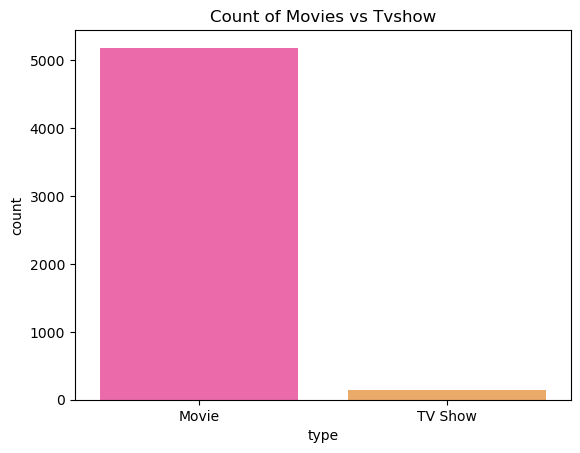

In [91]:
sns.countplot(x="type",data = df,hue="type",legend=False,palette = "spring")
plt.title("Count of Movies vs Tvshow")
plt.show()

#### 6b) Releases by year (how many titles were added each year)

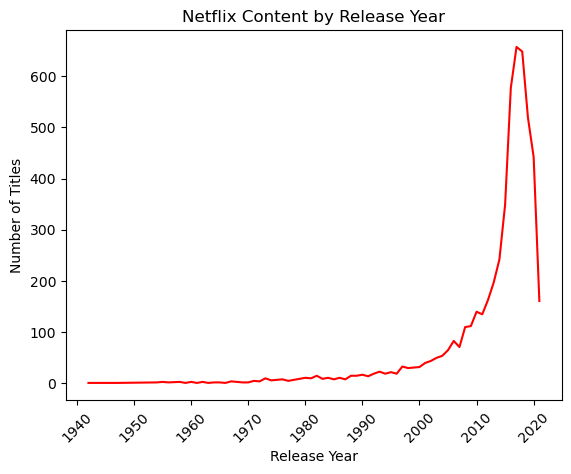

In [153]:
release_year_counts = df['release_year'].value_counts().sort_index()

sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,color="Red")
plt.title("Netflix Content by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


#### 6c) Top 10 countries producing content (note: many titles have multiple countries)

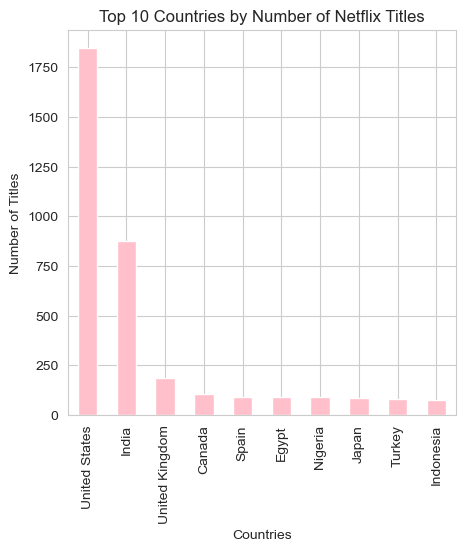

In [171]:
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar",figsize=(5,5),color="Pink")
plt.xlabel("Countries")
plt.ylabel("Number of Titles")
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.show()

#### 6d) Most common genres / categories

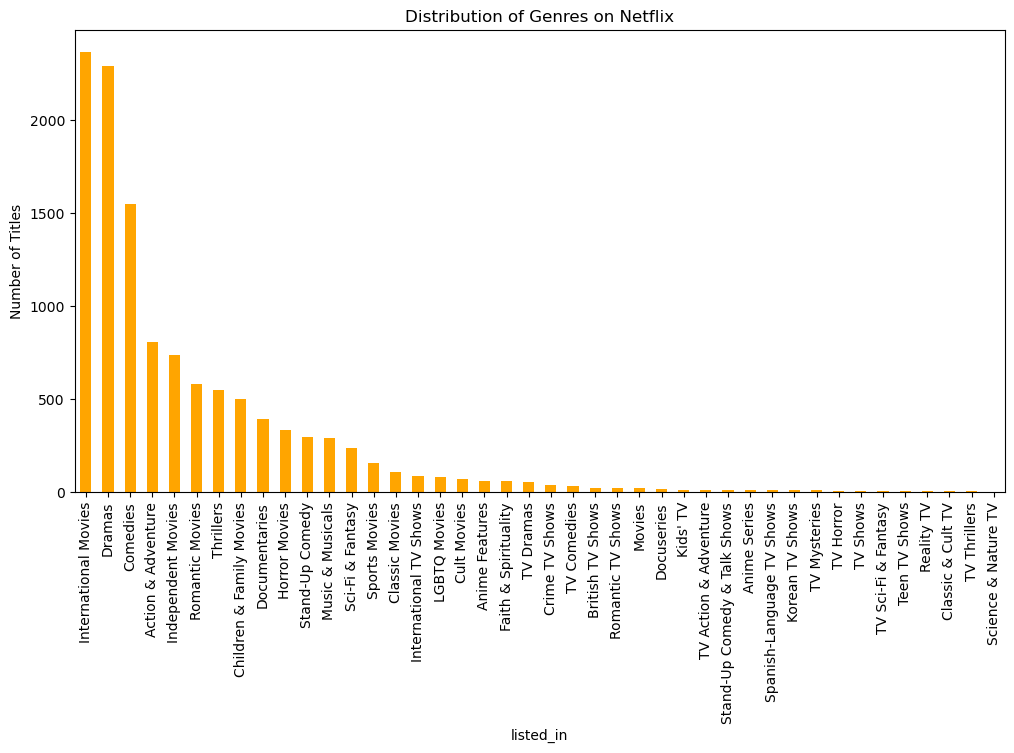

In [166]:
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()
genre_counts.plot(kind='bar', figsize=(12,6), color='orange')
plt.ylabel('Number of Titles')
plt.title('Distribution of Genres on Netflix')
plt.show()

#### 7) Small feature engineering: parse "duration"

In [88]:
import numpy as np

# Function to convert duration into minutes
def convert_to_minutes(duration, show_type):
    if pd.isna(duration):
        return np.nan
    
    if show_type == "Movie":
        # Example: "90 min"
        return int(duration.replace("min", "").strip())
    
    elif show_type == "TV Show":
        # Example: "2 Seasons" or "1 Season"
        num_seasons = int(duration.split()[0])
        return num_seasons * 450   # 1 season ≈ 10 episodes * 45 mins
    
    return np.nan

# Apply the function
df["duration_mins"] = df.apply(
    lambda row: convert_to_minutes(row["duration"], row["type"]),
    axis=1
)

# Check first few values
print(df[["type", "duration", "duration_mins"]].head(10))

       type   duration  duration_mins
7     Movie    125 min            125
8   TV Show  9 Seasons           4050
9     Movie    104 min            104
12    Movie    127 min            127
24    Movie    166 min            166
27    Movie    103 min            103
28    Movie     97 min             97
29    Movie    106 min            106
38    Movie     96 min             96
41    Movie    124 min            124


#### 7a)Distribution of Duration (Movies vs TV Shows)

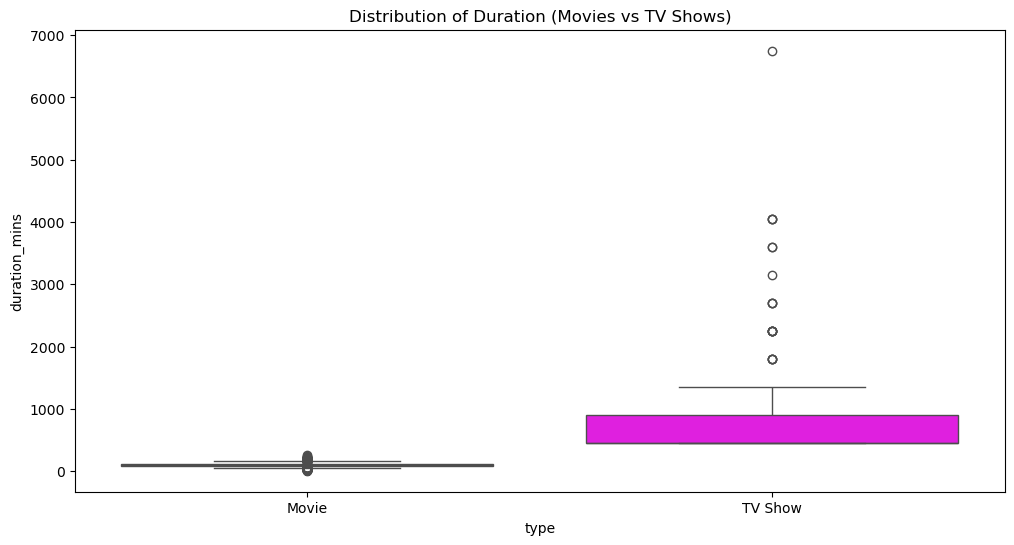

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(x="type", y="duration_mins", data=df,color= "magenta")
plt.title("Distribution of Duration (Movies vs TV Shows)")
plt.show();

#### 7b)Distribution of Duration (Movies)
##### For better understand

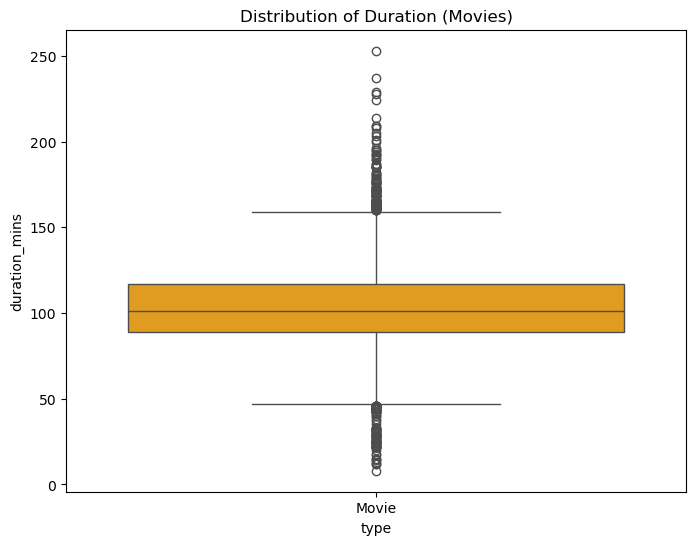

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(x="type", y="duration_mins", data=df[df["type"]=="Movie"],color = "orange")
plt.title("Distribution of Duration (Movies)")
plt.show()

#### 7c)Distribution of Duration (TV Show)
##### For better understand

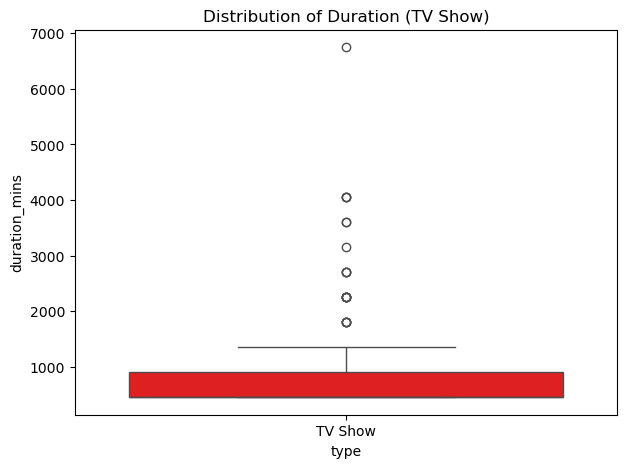

In [117]:
plt.figure(figsize=(7,5))
sns.boxplot(x="type", y="duration_mins", data=df[df["type"]=="TV Show"],color="red")
plt.title("Distribution of Duration (TV Show)")
plt.show()

### 8) Bivariate example: Type vs Release Year


##### Count how many movies vs tv shows per decade (an easy grouping for beginners)

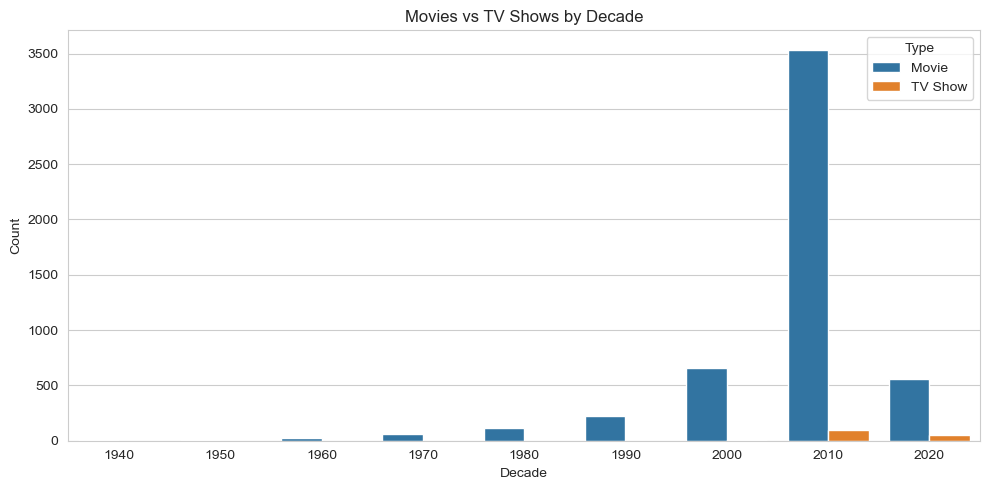

In [175]:
df['decade'] = (df['release_year'] // 10 * 10).fillna(0).astype(int)


plt.figure(figsize=(10,5))
sns.countplot(data=df, x='decade', hue='type')
plt.title('Movies vs TV Shows by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### 🏁 Conclusion

Through this Exploratory Data Analysis (EDA) on the Netflix dataset, we gained meaningful insights into the platform’s content trends and distribution. Movies clearly dominate the catalog, while TV Shows have shown consistent growth over the years, especially in recent decades. The majority of content originates from countries like the United States, India, and the United Kingdom, highlighting Netflix’s global reach and regional diversity.

In terms of content length, most movies fall between **90–120 minutes**, while TV Shows typically span **1–3 seasons**. The most common genres are **Dramas, Comedies, and Documentaries**, reflecting audience preferences for storytelling and realism.

This project successfully demonstrated data cleaning, feature engineering (e.g., converting duration to minutes), and visualization techniques for understanding large media datasets.

For future work, we could extend this analysis by:
- Exploring **rating distributions** to understand audience preferences.
- Building **interactive dashboards** using Plotly or Tableau.
- Performing **predictive modeling**, such as predicting show type or genre based on metadata.

Overall, this analysis provides a clear, data-driven view of Netflix’s evolving content library and is a solid foundation for more advanced data science projects.
